In [ ]:
!pip install pycaret

In [1]:
import pandas as pd
import numpy as np

In [2]:
from pycaret.classification import *

In [3]:
df=pd.read_csv('dataset.csv')

In [4]:
df.head()

,Timestamp,Gender,Age,Little interest or pleasure in doing things,"Feeling down, depressed, or hopeless","Trouble falling or staying asleep , or sleeping too much",Feeling tired or having little energy,Poor appetite or overeating,Feeling bad about yourself or that you are a failure or have let yourself or your family down,"Trouble concentrating on things, such as reading the newspaper or watching television",Moving or speaking so slowly that other people could have noticed. Or being so fighty or restless that you have been moving around a lot more than usual,"Thoughts that you would be better off dead, or of hurting yourself","If you checked off any problems, how difficult have these problems made it for you to do your work, take care of things at home, or get along with other people?",Score
0,2022/03/28 9:31:41 PM GMT+3,Male,24,1.0,NaN,1.0,2.0,2.0,1,2,2,1,0,12
1,2022/03/28 9:31:58 PM GMT+3,Male,25,2.0,1.0,2.0,2.0,2.0,2,2,1,1,2,17
2,2022/03/28 9:32:22 PM GMT+3,Male,24,3.0,1.0,1.0,1.0,0.0,2,0,1,1,2,12
3,2022/03/28 9:34:11 PM GMT+3,Male,25,0.0,0.0,1.0,1.0,1.0,0,2,1,0,0,6
4,2022/03/28 9:34:54 PM GMT+3,Male,25,2.0,3.0,3.0,3.0,3.0,3,3,2,3,3,28


In [5]:
df['Label'] = df['Score']

In [6]:
df['Label'] = np.where((df['Score']>=0) & (df['Score']<=4), "No", df['Label'])
df['Label'] = np.where((df['Score']>=5) & (df['Score']<=9), "Mild", df['Label'])
df['Label'] = np.where((df['Score']>=10) & (df['Score']<=14), "Moderate", df['Label'])
df['Label'] = np.where((df['Score']>=15) & (df['Score']<=19), "Moderately Severe", df['Label'])
df['Label'] = np.where((df['Score']>=20), "Severe", df['Label'])

In [7]:
df.head()

,Timestamp,Gender,Age,Little interest or pleasure in doing things,"Feeling down, depressed, or hopeless","Trouble falling or staying asleep , or sleeping too much",Feeling tired or having little energy,Poor appetite or overeating,Feeling bad about yourself or that you are a failure or have let yourself or your family down,"Trouble concentrating on things, such as reading the newspaper or watching television",Moving or speaking so slowly that other people could have noticed. Or being so fighty or restless that you have been moving around a lot more than usual,"Thoughts that you would be better off dead, or of hurting yourself","If you checked off any problems, how difficult have these problems made it for you to do your work, take care of things at home, or get along with other people?",Score,Label
0,2022/03/28 9:31:41 PM GMT+3,Male,24,1.0,NaN,1.0,2.0,2.0,1,2,2,1,0,12,Moderate
1,2022/03/28 9:31:58 PM GMT+3,Male,25,2.0,1.0,2.0,2.0,2.0,2,2,1,1,2,17,Moderately Severe
2,2022/03/28 9:32:22 PM GMT+3,Male,24,3.0,1.0,1.0,1.0,0.0,2,0,1,1,2,12,Moderate
3,2022/03/28 9:34:11 PM GMT+3,Male,25,0.0,0.0,1.0,1.0,1.0,0,2,1,0,0,6,Mild
4,2022/03/28 9:34:54 PM GMT+3,Male,25,2.0,3.0,3.0,3.0,3.0,3,3,2,3,3,28,Severe


In [8]:
df.drop(['Timestamp','Score'], axis=1, inplace=True)

In [9]:
df.Label.unique()

array(['Moderate', 'Moderately Severe', 'Mild', 'Severe', 'No'],
      dtype=object)

In [10]:
df.Label.value_counts()

Mild                 36
Moderately Severe    21
No                   18
Moderate             15
Severe               12
Name: Label, dtype: int64

<AxesSubplot:>

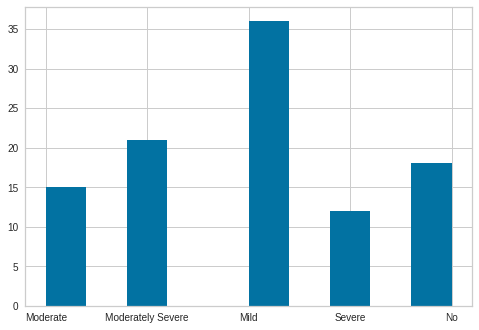

In [11]:
df['Label'].hist()

In [12]:
count_class_mild, count_class_mederately_severe, count_class_no, count_class_moderate, count_class_severe = df.Label.value_counts()

In [13]:
count_class_mild

36

In [14]:
df_class_no = df[df['Label']=='No']
df_class_mild=df[df['Label']=='Mild']
df_class_moderate = df[df['Label']=='Moderate']
df_class_moderately_severe = df[df['Label']=='Moderately Severe']
df_class_severe = df[df['Label']=='Severe']

In [15]:
df_class_no_under = df_class_no.sample(count_class_mild, replace=True)
df_class_moderate_under = df_class_moderate.sample(count_class_mild, replace=True)
df_class_moderately_severe_under = df_class_moderately_severe.sample(count_class_mild, replace=True)
df_class_severe_under = df_class_severe.sample(count_class_mild, replace=True)

In [16]:
df_resampled = pd.concat([df_class_no_under, df_class_moderate_under, df_class_moderately_severe_under, df_class_severe_under, df_class_mild], axis=0, ignore_index=True)

In [17]:
df_resampled.Label.value_counts()

No                   36
Moderate             36
Moderately Severe    36
Severe               36
Mild                 36
Name: Label, dtype: int64

In [18]:
df_resampled.shape

(180, 13)

In [19]:
df_resampled.head(15)

,Gender,Age,Little interest or pleasure in doing things,"Feeling down, depressed, or hopeless","Trouble falling or staying asleep , or sleeping too much",Feeling tired or having little energy,Poor appetite or overeating,Feeling bad about yourself or that you are a failure or have let yourself or your family down,"Trouble concentrating on things, such as reading the newspaper or watching television",Moving or speaking so slowly that other people could have noticed. Or being so fighty or restless that you have been moving around a lot more than usual,"Thoughts that you would be better off dead, or of hurting yourself","If you checked off any problems, how difficult have these problems made it for you to do your work, take care of things at home, or get along with other people?",Label
0,Female,18,0.0,0.0,0.0,2.0,0.0,0,0,0,0,0,No
1,Female,24,0.0,0.0,1.0,1.0,0.0,0,1,0,0,1,No
2,Female,23,1.0,0.0,0.0,1.0,0.0,0,0,1,0,0,No
3,Female,24,0.0,0.0,1.0,1.0,0.0,0,1,0,0,1,No
4,Female,23,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,No
5,Male,24,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,No
6,Female,23,3.0,0.0,0.0,0.0,0.0,0,0,0,0,0,No
7,Female,26,0.0,0.0,1.0,1.0,1.0,0,0,0,0,1,No
8,Male,21,1.0,0.0,1.0,1.0,1.0,0,0,0,0,0,No
9,Female,23,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,No


In [20]:
data = df_resampled.sample(frac=0.9, random_state=786)
data_unseen = df_resampled.drop(data.index).reset_index(drop=True)
data.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (162, 13)
Unseen Data For Predictions (18, 13)


In [21]:
data_unseen

,Gender,Age,Little interest or pleasure in doing things,"Feeling down, depressed, or hopeless","Trouble falling or staying asleep , or sleeping too much",Feeling tired or having little energy,Poor appetite or overeating,Feeling bad about yourself or that you are a failure or have let yourself or your family down,"Trouble concentrating on things, such as reading the newspaper or watching television",Moving or speaking so slowly that other people could have noticed. Or being so fighty or restless that you have been moving around a lot more than usual,"Thoughts that you would be better off dead, or of hurting yourself","If you checked off any problems, how difficult have these problems made it for you to do your work, take care of things at home, or get along with other people?",Label
0,Male,24,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,No
1,Male,24,2.0,0.0,1.0,0.0,0.0,0,1,0,0,0,No
2,Male,23,3.0,0.0,0.0,0.0,1.0,0,0,0,0,0,No
3,Male,31,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,No
4,Male,24,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,Moderate
5,Male,23,0.0,3.0,0.0,0.0,1.0,2,0,1,3,3,Moderate
6,Female,21,2.0,2.0,3.0,2.0,3.0,0,3,2,0,1,Moderately Severe
7,Male,24,3.0,1.0,0.0,2.0,2.0,1,2,2,0,2,Moderately Severe
8,Female,20,1.0,3.0,0.0,1.0,3.0,3,1,1,3,1,Moderately Severe
9,Female,NaN,1.0,2.0,2.0,2.0,3.0,2,2,1,2,2,Moderately Severe


In [22]:
clf = setup(data = data, target = 'Label',session_id=1229,normalize=True,transformation=True,ignore_low_variance=True)

,Description,Value
0,session_id,1229
1,Target,Label
2,Target Type,Multiclass
3,Label Encoded,"Mild: 0, Moderate: 1, Moderately Severe: 2, No: 3, Severe: 4"
4,Original Data,"(162, 13)"
5,Missing Values,True
6,Numeric Features,1
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [23]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8924,0.9670,0.8867,0.9133,0.8872,0.8647,0.8721,0.0250
lr,Logistic Regression,0.8583,0.9668,0.8533,0.8654,0.8405,0.8214,0.8364,0.7140
catboost,CatBoost Classifier,0.8409,0.9881,0.8333,0.8414,0.8172,0.7996,0.8170,1.0040
rf,Random Forest Classifier,0.8394,0.9830,0.8433,0.8638,0.8258,0.7990,0.8181,0.1230
et,Extra Trees Classifier,0.8394,0.9895,0.8433,0.8642,0.8243,0.7992,0.8149,0.1020
svm,SVM - Linear Kernel,0.8303,0.0000,0.8267,0.8616,0.8210,0.7867,0.7984,0.0150
gbc,Gradient Boosting Classifier,0.8227,0.9699,0.8200,0.8270,0.7976,0.7779,0.7994,0.1760
xgboost,Extreme Gradient Boosting,0.8144,0.9576,0.8133,0.8394,0.7966,0.7674,0.7850,9.6860
lightgbm,Light Gradient Boosting Machine,0.8129,0.9543,0.8067,0.8265,0.7922,0.7637,0.7783,7.3790
ridge,Ridge Classifier,0.7955,0.0000,0.7833,0.8060,0.7785,0.7419,0.7550,0.0370


In [24]:
best

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

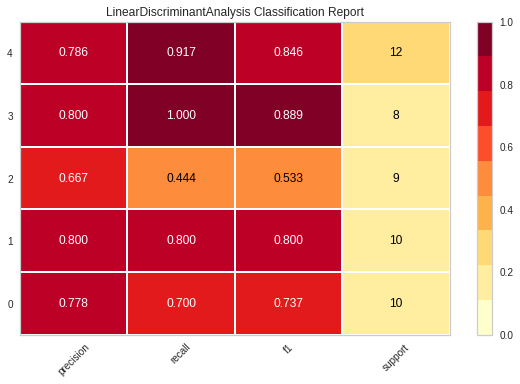

In [25]:
plot_model(best, plot='class_report')

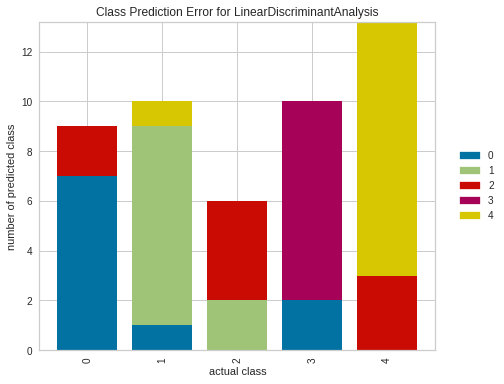

In [26]:
plot_model(best, plot='error')

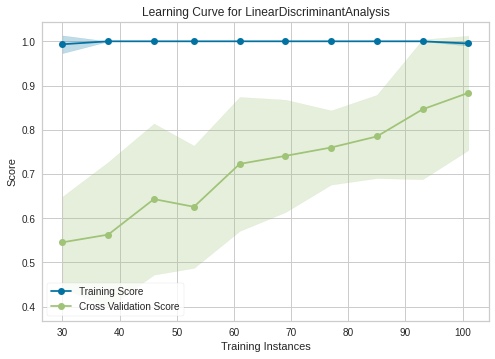

In [27]:
plot_model(best, plot='learning')

In [28]:
pd.set_option('display.max_columns', 500)

In [29]:
# alright lets make some predictions 
predict_model(best)[['Label', 'Score']]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.7755,0.9240,0.7722,0.7675,0.7639,0.7177,0.7211


,Label,Label,Score
0,Mild,Mild,1.000
1,Moderate,Moderate,1.000
2,Moderately Severe,Severe,1.000
3,Moderate,Moderate,1.000
4,Mild,Moderate,1.000
5,Mild,Mild,1.000
6,Severe,Severe,1.000
7,Severe,Severe,1.000
8,Moderately Severe,Severe,1.000
9,No,No,1.000


In [30]:
final_model = finalize_model(best)

In [31]:
# Moment of truth … let’s see how our classifier does if we can predict using the unseen data 


In [32]:
unseen_predictions = predict_model(final_model, data=data_unseen)
unseen_predictions

,Gender,Age,Little interest or pleasure in doing things,"Feeling down, depressed, or hopeless","Trouble falling or staying asleep , or sleeping too much",Feeling tired or having little energy,Poor appetite or overeating,Feeling bad about yourself or that you are a failure or have let yourself or your family down,"Trouble concentrating on things, such as reading the newspaper or watching television",Moving or speaking so slowly that other people could have noticed. Or being so fighty or restless that you have been moving around a lot more than usual,"Thoughts that you would be better off dead, or of hurting yourself","If you checked off any problems, how difficult have these problems made it for you to do your work, take care of things at home, or get along with other people?",Label,Score
0,Male,24,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,No,1.0000
1,Male,24,2.0,0.0,1.0,0.0,0.0,0,1,0,0,0,No,1.0000
2,Male,23,3.0,0.0,0.0,0.0,1.0,0,0,0,0,0,Mild,0.9238
3,Male,31,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,No,1.0000
4,Male,24,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,Moderate,1.0000
5,Male,23,0.0,3.0,0.0,0.0,1.0,2,0,1,3,3,Moderate,1.0000
6,Female,21,2.0,2.0,3.0,2.0,3.0,0,3,2,0,1,Moderately Severe,1.0000
7,Male,24,3.0,1.0,0.0,2.0,2.0,1,2,2,0,2,Moderately Severe,1.0000
8,Female,20,1.0,3.0,0.0,1.0,3.0,3,1,1,3,1,Moderately Severe,1.0000
9,Female,NaN,1.0,2.0,2.0,2.0,3.0,2,2,1,2,2,Moderately Severe,1.0000


Label and score are added to the data frame. • Label is the predicted outcome • Score is the predicted probability

In [33]:
save_model(final_model, 'my_best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       float_dtype='float32', id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Label',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical='not_available',
                                 fill_va...
                 ('dummy', Dummify(target='Label')),
                 ('fix_perfect', Remove_100(target='Label')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passt

In [34]:
loaded_model = load_model('my_best_model')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      float_dtype='float32', id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Label',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical='not_available',
                                fill_va...
                ('dummy', Dummify(target='Label')),
                ('fix_perfect', Remove_100(target='Label')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                (

In [35]:
sample = data_unseen[2:3].drop('Label', axis=1)

In [38]:
sample.columns

Index(['Gender', 'Age', 'Little interest or pleasure in doing things',
       'Feeling down, depressed, or hopeless',
       'Trouble falling or staying asleep , or sleeping too much',
       'Feeling tired or having little energy', 'Poor appetite or overeating',
       'Feeling bad about yourself or that you are a failure or have let yourself or your family down',
       'Trouble concentrating on things, such as reading the newspaper or watching television',
       'Moving or speaking so slowly that other people could have noticed. Or being so fighty or restless that you have been moving around a lot more than usual',
       'Thoughts that you would be better off dead, or of hurting yourself',
       'If you checked off any problems, how difficult have these problems made it for you to do your work, take care of things at home, or get along with other people?'],
      dtype='object')

In [37]:
testing_sample = predict_model(loaded_model, data=sample)
testing_sample

,Gender,Age,Little interest or pleasure in doing things,"Feeling down, depressed, or hopeless","Trouble falling or staying asleep , or sleeping too much",Feeling tired or having little energy,Poor appetite or overeating,Feeling bad about yourself or that you are a failure or have let yourself or your family down,"Trouble concentrating on things, such as reading the newspaper or watching television",Moving or speaking so slowly that other people could have noticed. Or being so fighty or restless that you have been moving around a lot more than usual,"Thoughts that you would be better off dead, or of hurting yourself","If you checked off any problems, how difficult have these problems made it for you to do your work, take care of things at home, or get along with other people?",Label,Score
2,Male,23,3.0,0.0,0.0,0.0,1.0,0,0,0,0,0,Mild,0.9238
